In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
os.listdir()

['best5models.png',
 '.DS_Store',
 'results.txt',
 'Param study.ipynb',
 '4params.csv',
 '.ipynb_checkpoints',
 'Graphs',
 'Distances',
 'all_results.csv']

In [3]:
list_distances = []
list_params = []
for i in range(1,82):
    new_path = os.path.join("Distances",str(i),"distances.txt")
    text_file = open(new_path, "r")
    distances = text_file.read()
    list_distances.append(eval(distances))
    new_path = os.path.join("Graphs",str(i),"params.txt")
    text_file = open(new_path, "r")
    dict = eval(text_file.read())
    dict["values"] = distances
    list_params.append(dict)

In [4]:
df = pd.DataFrame(list_params,columns=list_params[0].keys())

In [5]:
new_path = os.path.join("results.txt")
text_file = open(new_path, "r")
test_values = eval(text_file.read()).values() 
df["test_values"] = test_values

In [6]:
df.to_csv("4params.csv")

# Test values throughought training per parameter

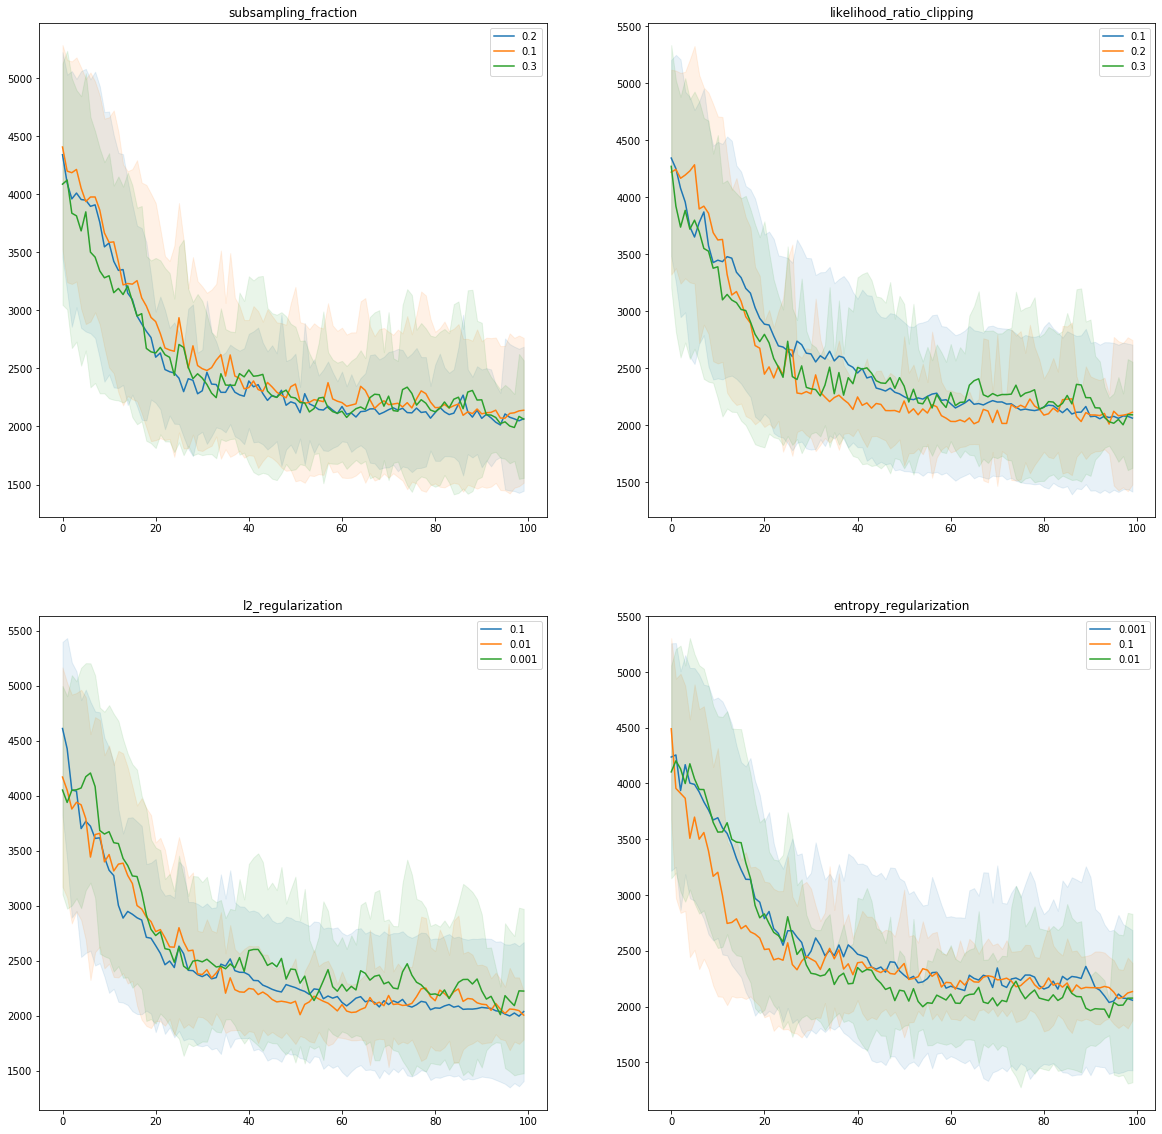

In [7]:
param_list = ["subsampling_fraction","likelihood_ratio_clipping","l2_regularization","entropy_regularization"]
number_columns = 2
number_lines = len(param_list)//number_columns if len(param_list)%number_columns ==0 else ((len(param_list)//number_columns)+1)
fig, ax = plt.subplots(number_lines,number_columns,figsize=((20,20)))
for i,param in enumerate(param_list):
        for j,param_value in enumerate(df[param].unique()):
            color = "C"+str(j)
            values = df[df[param]==param_value]["values"]
            list_values = [eval(val) for val in values]
            #pd.DataFrame(list_values).mean().transpose().plot(ax=ax[i//number_columns,i%number_columns],label=param_value,figsize=((20,20)))
            x = pd.DataFrame(list_values).mean().transpose().index.values
            y = pd.DataFrame(list_values).mean().transpose().values
            std = pd.DataFrame(list_values).std().transpose().values
            ax[i//number_columns,i%number_columns].plot(x,y,label=param_value)
            ax[i//number_columns,i%number_columns].fill_between(x, (y-std), (y+std), color=color, alpha=.1)
        ax[i//number_columns,i%number_columns].figsize = ((20,20))
        ax[i//number_columns,i%number_columns].set_title(param)
        ax[i//number_columns,i%number_columns].legend()
plt.savefig("lineplots.png")

# Final Test value per Parameters

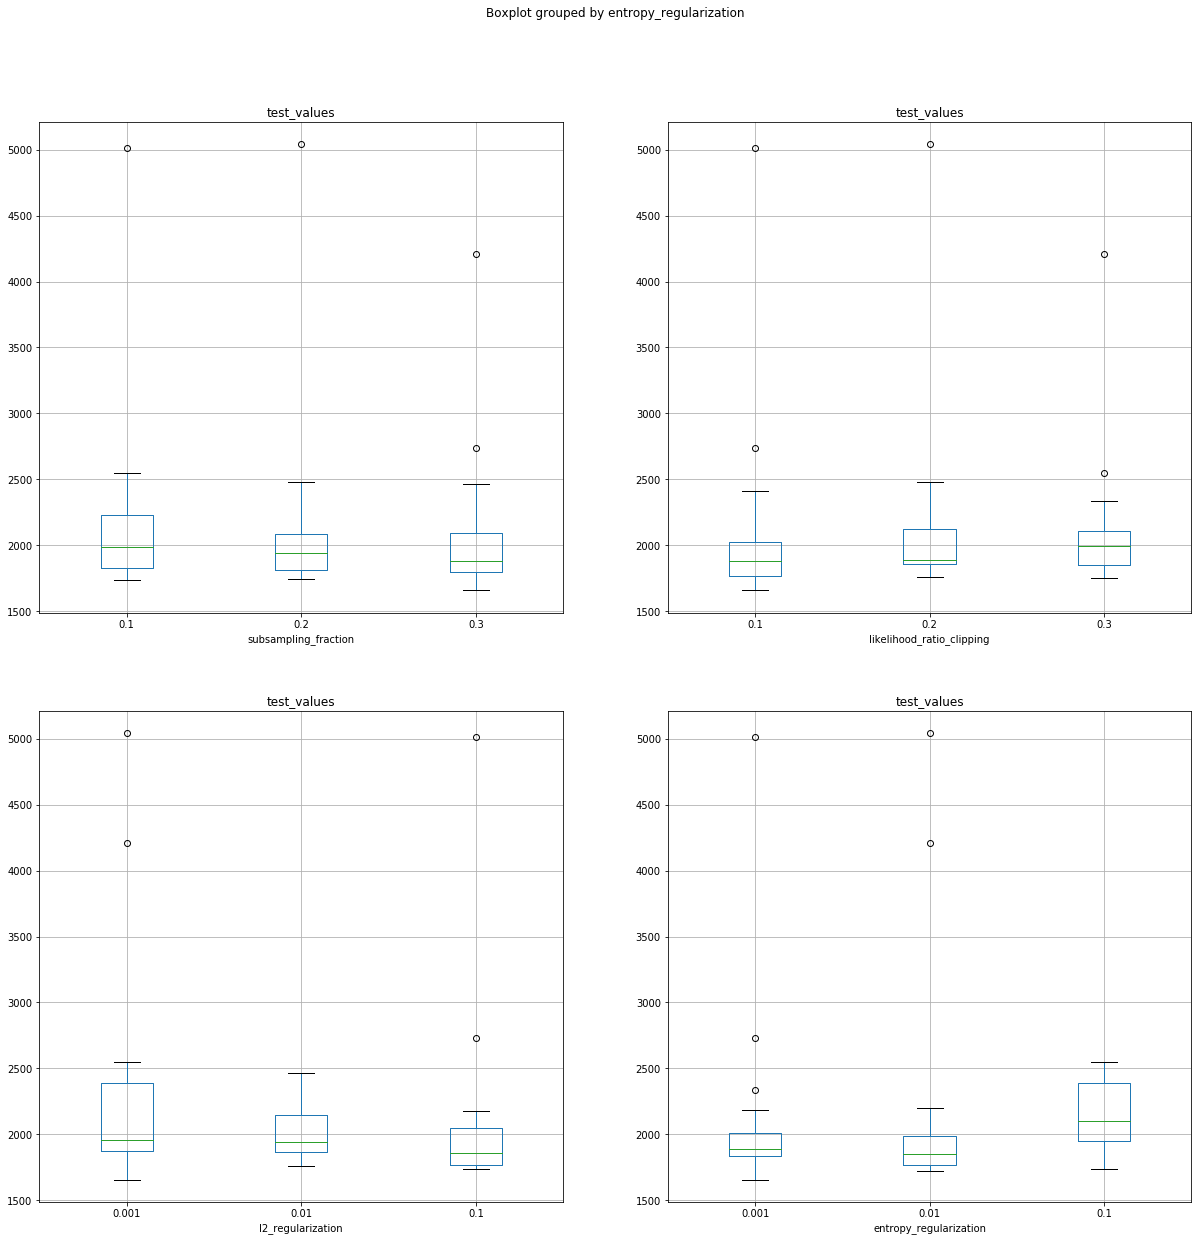

In [8]:
param_list = ["subsampling_fraction","likelihood_ratio_clipping","l2_regularization","entropy_regularization"]
number_columns = 2
number_lines = len(param_list)//number_columns if len(param_list)%number_columns ==0 else ((len(param_list)//number_columns)+1)
fig, ax = plt.subplots(number_lines,number_columns,figsize=((20,20)))
for i,param in enumerate(param_list):
        df.boxplot(column="test_values",by=param,ax=ax[i//number_columns,i%number_columns],figsize=((20,20)))
plt.savefig("boxplots.png")
    

# All Agents

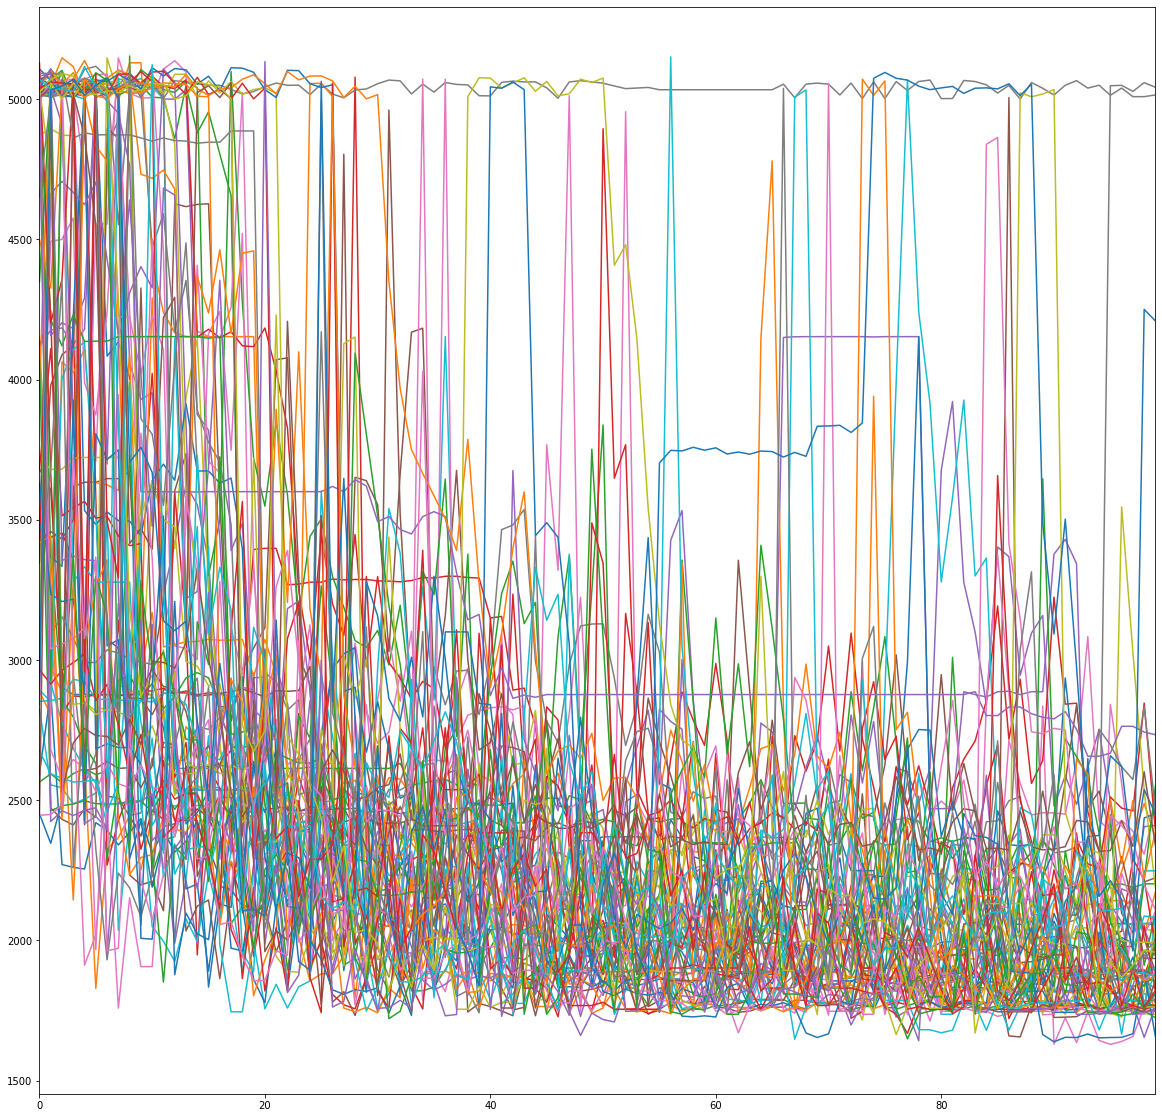

In [9]:
fig, ax = plt.subplots()
for i in range(0,len(list_distances)):
    pd.Series(list_distances[i]).plot(figsize=((20,20)),ax=ax)
plt.savefig("allmodels.png")

# Top 5 Agents

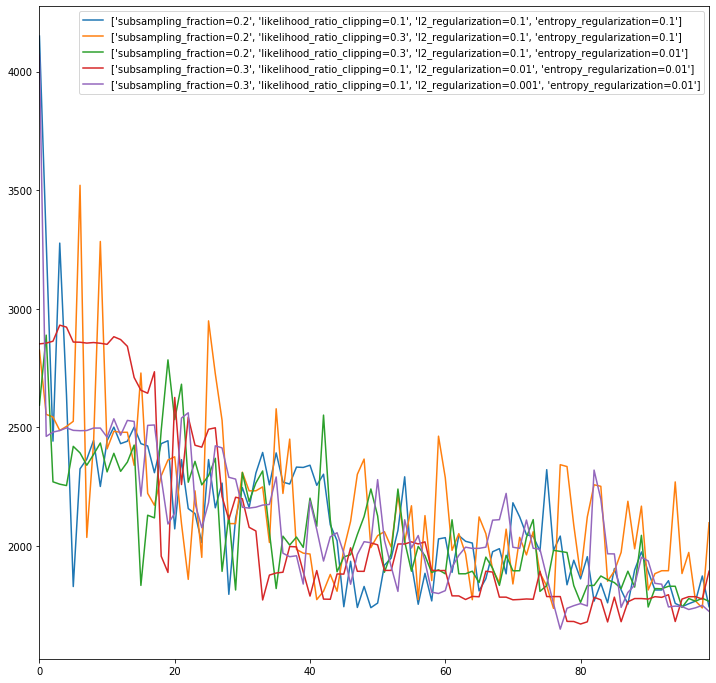

In [10]:
#list_distances = [eval(list) for list in list_distances]

df = pd.DataFrame(list_distances).transpose()
df_temp = df.loc[:,(df.mean()<2200) & (df.std()<450)]
df_temp.plot(figsize=(12,12))
legend  = [str([str(param)+"="+str(list_params[i][param]) for param in param_list]) for i in df_temp.columns.values]
plt.legend(legend)
plt.savefig("best5models.png")

In [11]:
df.to_csv("all_results.csv")